# RC Circuit Equation and Solution

An **RC circuit** consists of a **resistor \( R \)** and a **capacitor \( C \)** connected in series with a voltage source \( V(t) \). The governing differential equation for the voltage across the capacitor as it charges or discharges can be derived using **Kirchhoff's Voltage Law (KVL)**.

## Circuit Diagram

<img src="img/RCcircuit.png" alt="RC Circuit Diagram" width="400"/>



## Governing Equation:

For a charging capacitor in an RC circuit, **KVL** gives the following equation:
$$
V(t) = V_R(t) + V_C(t)
$$

Where:
- $ V(t) $ is the total applied voltage,
- $ V_R(t) = i(t)R $ is the voltage drop across the resistor,
- $ \frac{dV_C(t)}{dt} = \frac{i(t)}{C} $ is the voltage across the capacitor 


## Solution for Discharging Capacitor:

When the capacitor discharges through the resistor (with no external voltage source), the governing equation simplifies to:
$$
0 = R \cdot C \frac{dV_C(t)}{dt} + V_C(t)
$$

Rearranging, we get:
$$
\frac{dV_C(t)}{dt} = -\frac{V_C(t)}{R \cdot C}
$$

Solving this differential equation with the initial condition \( V_C(0) = V_0 \), the solution is:
$$
V_C(t) = V_0 e^{-\frac{t}{R \cdot C}}
$$
This represents the **exponential decay** of the voltage across the capacitor during the discharge process.


In [236]:
# Importer les bibliothèques nécessaires
using ModelingToolkit, DifferentialEquations

In [2]:
# Déclaration des variables du système
@variables t v(t)  # t est le temps, v(t) est la tension aux bornes du condensateur

# Déclaration des paramètres du circuit
@parameters R C  # R est la résistance, C est la capacité

# Définir l'entrée de courant
@derivatives D'~t  # D représente la dérivée par rapport au temps

# Loi de Kirchhoff pour le circuit RC
eqs = D(v) ~ -v / (R * C)


┌ Warning: `@derivatives D'''~x` is deprecated. Use `Differential(x)^3` instead.
│   caller = ip:0x0
└ @ Core :-1


Differential(t)(v(t)) ~ (-v(t)) / (C*R)

In [3]:
# Définir le système avec l'équation précédemment déclarée
@named rc_circuit = ODESystem(eqs)


Model rc_circuit with 1 equations
States (1):
  v(t)
Parameters (2):
  C
  R

In [4]:
# Conditions initiales
u0 = [v => 1.0]  # Initialement, la tension du condensateur est de 1V

# Paramètres spécifiques
p = [R => 1.0, C => 1.0]  # On choisit R=1 Ohm et C=1 Farad


2-element Vector{Pair{Num, Float64}}:
 R => 1.0
 C => 1.0

In [5]:
# Définir l'intervalle de temps pour la simulation
tspan = (0.0, 10.0)  # Simulation sur 10 secondes

# Création du problème différentiel
prob = ODEProblem(rc_circuit, u0, tspan, p)

# Résolution du problème
sol = solve(prob)


retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 19-element Vector{Float64}:
  0.0
  0.10001999200479662
  0.34208427873632274
  0.6553980290285384
  1.0312652902321524
  1.4709406498424789
  1.9659577002710475
  2.5116828197051655
  3.1005131845932916
  3.7267802882369727
  4.384652335738251
  5.0699090384067516
  5.779643487536935
  6.513468337242375
  7.274570876159992
  8.071453116363745
  8.918910524409286
  9.837942955834713
 10.0
u: 19-element Vector{Vector{Float64}}:
 [1.0]
 [0.9048193287657775]
 [0.7102883564034526]
 [0.5192354320104405]
 [0.35655575232768816]
 [0.2297097760377979]
 [0.14002246806154703]
 [0.08113256081377467]
 [0.045027140385092014]
 [0.02407120255336928]
 [0.012468055449568525]
 [0.006283629248389935]
 [0.0030902689323040835]
 [0.0014836283958257416]
 [0.0006931308501843809]
 [0.00031244947575965646]
 [0.0001339081482131601]
 [5.343328199567461e-5]
 [4.543927265606441e-5

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


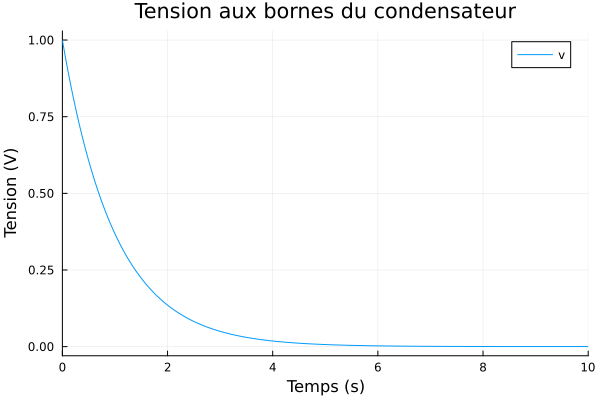

In [8]:
# Importer les outils de visualisation
using Plots

# Tracer la tension aux bornes du condensateur en fonction du temps
plot(sol, vars=[v], title="Tension aux bornes du condensateur", xlabel="Temps (s)", ylabel="Tension (V)")


# Using the JLBrainPhysio Library

We now solve the same circuit using the hydraulic equivalent elements from the **JLBrainPhysio** library. In this section, we use the hydraulic equivalent to the electrical RC circuit by mapping the variables between the two systems.

## Hydraulic to Electrical Equivalences:

The electrical and hydraulic systems have analogous elements, and we can map the variables as follows:

- **Pressure (P)** is analogous to **Voltage (V)**.
- **Flow rate (Q)** is analogous to **Current (i)**.

Thus, the governing equations for the hydraulic system follow the same form as the electrical system but are expressed in terms of pressure, flow rate, hydraulic resistance, and compliance.


In [237]:
using JLBrainPhysio
using JLBrainPhysio.ModelingToolkit #needed to define time
using JLBrainPhysio.DifferentialEquations #needed to solve the system of equations

In [137]:
using Plots

In [173]:
@variables t;

In [174]:
@named P_ground = ConstantPressure(P=0);

In [224]:
@named P_in = ConstantPressure(P=0);

In [201]:
@named R = Resistor(R=1)

Model R with 4 (6) equations
States (6):
  Δp(t) [defaults to 0.0]
  q(t) [defaults to 0.0]
  in₊p(t) [defaults to 1.0]
  in₊q(t) [defaults to 1.0]
  out₊p(t) [defaults to 1.0]
  out₊q(t) [defaults to 1.0]
Parameters (1):
  R [defaults to 1]

In [202]:
@named C = Capacitor(C=1);

In [225]:
elements= [P_in,P_ground, R, C]
assembly = [
        connect(P_in.node, R.out)
        connect(R.in, C.out)
        connect(C.in, P_ground.node)
];

In [226]:
## Compose the whole ODAE system
@named _model = ODESystem(assembly, t);
@named model = compose(_model, elements)

Model model with 10 (16) equations
States (16):
  P_in₊node₊p(t) [defaults to 1.0]
  P_in₊node₊q(t) [defaults to 1.0]
  P_ground₊node₊p(t) [defaults to 1.0]
  P_ground₊node₊q(t) [defaults to 1.0]
  R₊Δp(t) [defaults to 0.0]
  R₊q(t) [defaults to 0.0]
⋮
Parameters (4):
  P_in₊P [defaults to 0]
  P_ground₊P [defaults to 0]
  R₊R [defaults to 1]
  C₊C [defaults to 1]

In [227]:
## And simplify it
sys = structural_simplify(model)

Model model with 1 equations
States (1):
  C₊Δp(t) [defaults to 0.0]
Parameters (4):
  P_in₊P [defaults to 0]
  P_ground₊P [defaults to 0]
  R₊R [defaults to 1]
  C₊C [defaults to 1]
Incidence matrix:1×2 SparseArrays.SparseMatrixCSC{Num, Int64} with 2 stored entries:
 ×  ×

In [228]:
states(sys)

1-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 C₊Δp(t)

In [230]:
parameters(sys)

4-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 P_in₊P
 P_ground₊P
 R₊R
 C₊C

In [231]:
observed(sys)

15-element Vector{Equation}:
 P_in₊node₊p(t) ~ P_in₊P
 P_ground₊node₊p(t) ~ P_ground₊P
 R₊out₊p(t) ~ P_in₊node₊p(t)
 C₊in₊p(t) ~ P_ground₊node₊p(t)
 C₊out₊p(t) ~ C₊Δp(t) + C₊in₊p(t)
 R₊Δp(t) ~ -C₊out₊p(t) + P_in₊node₊p(t)
 R₊in₊p(t) ~ C₊out₊p(t)
 R₊q(t) ~ (-R₊Δp(t)) / R₊R
 R₊in₊q(t) ~ R₊q(t)
 C₊q(t) ~ R₊q(t)
 P_in₊node₊q(t) ~ R₊q(t)
 R₊out₊q(t) ~ -R₊in₊q(t)
 C₊in₊q(t) ~ C₊q(t)
 P_ground₊node₊q(t) ~ -C₊q(t)
 C₊out₊q(t) ~ -C₊in₊q(t)

In [232]:
u0 = [C.Δp => 1.0
      C.out.q => 1.0]

2-element Vector{Pair{Num, Float64}}:
    C₊Δp(t) => 1.0
 C₊out₊q(t) => 1.0

In [233]:
prob = ODAEProblem(sys,u0, (0, 10))

ODEProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 10)
u0: 1-element Vector{Float64}:
 1.0

In [234]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 19-element Vector{Float64}:
  0.0
  0.10001999200479662
  0.34208427873632274
  0.6553980290285384
  1.0312652902321524
  1.4709406498424789
  1.9659577002710475
  2.5116828197051655
  3.1005131845932916
  3.7267802882369727
  4.384652335738251
  5.0699090384067516
  5.779643487536935
  6.513468337242375
  7.274570876159992
  8.071453116363745
  8.918910524409286
  9.837942955834713
 10.0
u: 19-element Vector{Vector{Float64}}:
 [1.0]
 [0.9048193287657775]
 [0.7102883564034526]
 [0.5192354320104405]
 [0.35655575232768816]
 [0.2297097760377979]
 [0.14002246806154703]
 [0.08113256081377467]
 [0.045027140385092014]
 [0.02407120255336928]
 [0.012468055449568525]
 [0.006283629248389935]
 [0.0030902689323040835]
 [0.0014836283958257416]
 [0.0006931308501843809]
 [0.00031244947575965646]
 [0.0001339081482131601]
 [5.343328199567461e-5]
 [4.543927265606441e-5

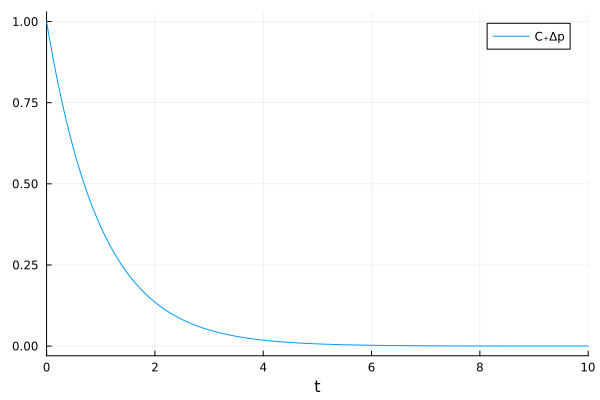

In [235]:
plot(sol)